<a href="https://colab.research.google.com/github/Israel-Garcilazo/EDP1/blob/main/Ecuaci%C3%B3n_Onda_M%C3%A9todo_Explicito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio de ecuación de onda unidimensional mediante el método explícito de diferencias finitas.

El problema a resolver es la siguiente ecuación de onda:

$$u_{tt} = 4\,u_{xx}, \quad 0<x<1,\; t>0$$

sujeta a las condiciones:

- Condiciones de frontera: $u(0,t)=u(1,t)=0$
- Condición inicial: $u(x,0)=\sin(\pi x)$
- Velocidad inicial: $u_t(x,0)=0$

Constantes: $h=0.1$, $k=0.05$.

La solución exacta para este problema es:

$$u(x,t)=\sin(\pi x)\cos(2\pi t)$$

Se resolverá con la fórmula vista en clase:

$$u_i^{n+1} = 2u_i^n - u_i^{n-1} + r\left(u_{i+1}^n -2u_i^n + u_{i-1}^n\right), \quad r=\left( \frac{c k}{h} \right)^2,\; c=2.$$

Se implementará el siguiente código comentado:

In [1]:
# Importamos las librerias necesarias, que son las mismas del código de Crank-Nicolson salvo que en esta se integran las librerias para graficar 3D.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate
from IPython.display import HTML, display
import matplotlib.animation as animation

plt.rcParams['figure.figsize'] = (8,5)


In [9]:
# Parámetros para la malla.
h = 0.1
k = 0.05
c = 2.0        # Este es el parametro de la velocidad en la ecuación de onda.

# Calculamos el factor de estabilidad.
r = (c*k/h)**2

# Creamos los vectores que guardarán todos los valores de la malla.
x = np.arange(0, 1+h, h)
t = np.arange(0, 1.0 + 1e-12, k)

# Inicialización de la matriz solución u.
u = np.zeros((nt, nx))

# Definimos las variables que contendran las condiciones iniciales.
# Condición inicial u(x,0) = sin(pi x).
u[0,:] = np.sin(np.pi * x)
# Condiciones de frontera.
u[:,0] = 0.0
# velocidad inicial de la ecuación.
v = np.zeros_like(x)
u[:, -1] = 0.0

for i in range(1, nx-1):
    pass


In [10]:
# Esta sección sirve para rellenar los vectores con sus respectivos valores previos a la inicialización del proceso.
# Inicializamos u con la condición inicial y calculamos u^1.
u = np.zeros((nt, nx))
u[0,:] = np.sin(np.pi * x)

# Condiciones de frontera.
u[:,0] = 0.0
u[:,-1] = 0.0

# Este ciclo es el que calcula con la fórmula las diferentes iteraciones.
for i in range(1, nx-1):
    u[1,i] = u[0,i] + 0.5 * r * (u[0,i+1] - 2*u[0,i] + u[0,i-1])

# Uso explicito de las fórmulas.
a = 0.0
for n in range(1, nt-1):
    for i in range(1, nx-1):
        u[n+1,i] = (2*u[n,i] - u[n-1,i]
                    + r*(u[n,i+1] - 2*u[n,i] + u[n,i-1]))


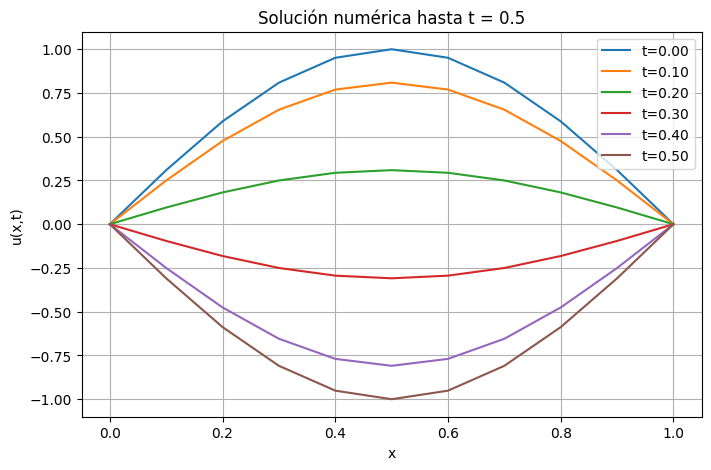

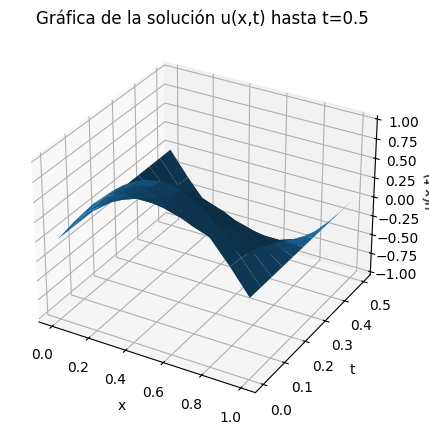

In [11]:
# Comenzamos con la graficación.
plot_times = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5] # pata t desde 0 hasta 0.5 con paso de 0.1.
indices = [int(np.round(tt/k)) for tt in plot_times]

# Líneas base para abrir el entorno de graficación.
plt.figure()
for idx, tt in zip(indices, plot_times):
    plt.plot(x, u[idx,:], label=f't={tt:.2f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Solución numérica hasta t = 0.5')
plt.legend()
plt.grid(True)
plt.show()

# Esta sección es para abrir el entorno de graficación en 3D
max_idx_3d = int(round(0.5/k)) + 1
X, T = np.meshgrid(x, t[:max_idx_3d])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, u[:max_idx_3d,:], linewidth=0, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.set_title('Gráfica de la solución u(x,t) hasta t=0.5')
plt.show()


In [12]:
# Sección para la comparación de los resultados en una tabla.

# Inicializamos una variable  que copie los valores antes obtenidos para x.
xi = x.copy()
# Y este es el arreglo que se mostrará en la tabla.
table12_6 = np.array([0.0, 0.3090169944, 0.5877852523, 0.8090169944,
                      0.9510565163, 1.0, 0.9510565163, 0.8090169944,
                      0.5877852523, 0.3090169944, 0.0])

# Luego otra variable que contendra a los valores de la solución.
u_num_t1 = u[-1,:]

# Ciclo que acomoda en las filas y columnas los valores en los vectores antes definidos.
rows = []
for xi_i, u_num_i, tab_i in zip(xi, u_num_t1, table12_6):
    rows.append([f"{xi_i:.1f}", f"{u_num_i:.10f}", f"{tab_i:.10f}", f"{abs(u_num_i - tab_i):.10f}"])

print(tabulate(rows, headers=['x','Solución numérica','Solución analítica','Error de aproximación']))

# Calculos de ambos errores.
print('\nError máximo entre solución numérica y solución real:', np.max(np.abs(u_num_t1 - table12_6)))
print('Error cuadrático entre la solución numérica y la solución real:', np.sqrt(np.mean((u_num_t1 - table12_6)**2)))


  x    Solución numérica    Solución analítica    Error de aproximación
---  -------------------  --------------------  -----------------------
0               0                     0                               0
0.1             0.309017              0.309017                        0
0.2             0.587785              0.587785                        0
0.3             0.809017              0.809017                        0
0.4             0.951057              0.951057                        0
0.5             1                     1                               0
0.6             0.951057              0.951057                        0
0.7             0.809017              0.809017                        0
0.8             0.587785              0.587785                        0
0.9             0.309017              0.309017                        0
1               0                     0                               0

Error máximo entre solución numérica y solución real: 2.5052626

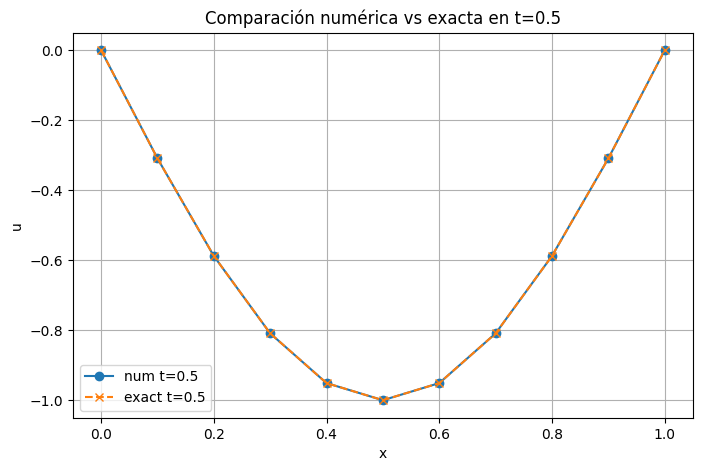

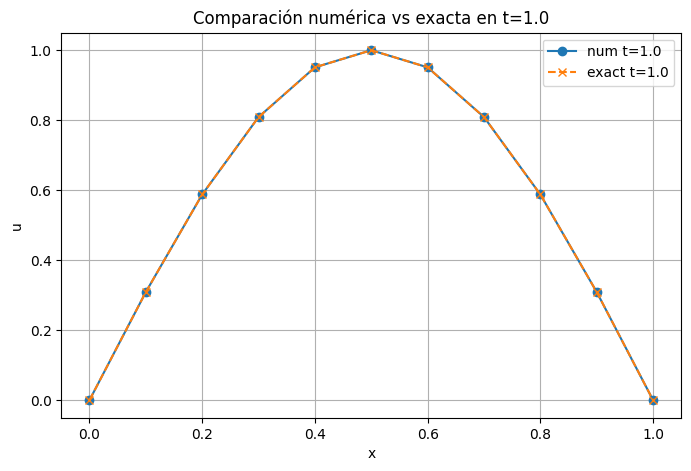

Error máximo en t=1.0 entre la solución numérica y la solución real: 4.440892098500626e-16
Error cuadrático entre la solución numérica y la solución real: 1.5236130947853275e-16


In [13]:
# Ahora la sección de mostrar graficamente dicha comparación.

def u_exact(xv, tv):
    return np.sin(np.pi * xv) * np.cos(2 * np.pi * tv)

for tt in [0.5, 1.0]:
    idx = int(round(tt/k))
    plt.figure()
    plt.plot(x, u[idx,:], 'o-', label=f'num t={tt}')
    plt.plot(x, u_exact(x, tt), 'x--', label=f'exact t={tt}')
    plt.title(f'Comparación numérica vs exacta en t={tt}')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.legend()
    plt.grid(True)
    plt.show()

# Errores.
u_exact_t1 = u_exact(x, 1.0)
print('Error máximo en t=1.0 entre la solución numérica y la solución real:', np.max(np.abs(u[-1,:] - u_exact_t1)))
print('Error cuadrático entre la solución numérica y la solución real:', np.sqrt(np.mean((u[-1,:] - u_exact_t1)**2)))


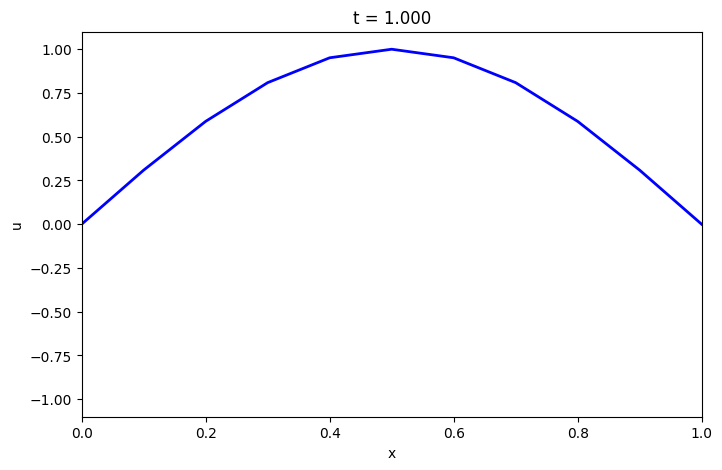

In [14]:
# Ahora, para la animación de la evolución temporal, abrimos el entorno con las siguientes líneas.
fig, ax = plt.subplots()
line, = ax.plot(x, u[0,:], 'b-', lw=2)
ax.set_xlim(0,1)
ax.set_ylim(1.1*np.min(u), 1.1*np.max(u))
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_title('Evolución temporal de la onda')

# Usamos la función de animación.
def animate(n):
    line.set_ydata(u[n,:])
    ax.set_title(f't = {t[n]:.3f}')
    return (line,)

ani = animation.FuncAnimation(fig, animate, frames=nt, interval=80, blit=True)

# Se ocupa HTML para que se pueda visualizar en colab.
from IPython.display import HTML
html_anim = ani.to_jshtml()
display(HTML(html_anim))
